In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_excel('../data/superstore.xlsx')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Salespeople,Returned
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,...,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,Lon Bonher,No
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Kauri Anaru,No
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,Kauri Anaru,No
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,Gilbert Wolff,No
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,Katlego Akosua,No


## Missing values

In [47]:
nan_count_per_column = df.isna().sum()
print("Conteo de NaN en cada columna:\n", nan_count_per_column)

Conteo de NaN en cada columna:
 Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Segment             0
City                0
State               0
Country             0
Region              0
Market              0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Salespeople       384
Returned            0
dtype: int64


In [49]:
df['Salespeople'] = df['Salespeople'].fillna("Unknown")

In [52]:
nan_count_per_column = df.isna().sum()
print("Conteo de NaN en cada columna:\n", nan_count_per_column)

Conteo de NaN en cada columna:
 Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Salespeople       0
Returned          0
dtype: int64


### Change type of the data values

In [30]:
# Change Quantity value type to uint8
df['Quantity'] = df['Quantity'].astype('uint8')

In [31]:
# Change Sales value type to float16
df['Sales'] = df['Sales'].astype('float64')

In [32]:
# Change Discount value type to float16
df['Discount'] = df['Discount'].astype('float64')

In [33]:
# Change Profit value type to float16
df['Profit'] = df['Profit'].astype('float64')

In [34]:
# Change Shipping Cost value type to float16
df['Shipping Cost'] = df['Shipping Cost'].astype('float64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Segment         51290 non-null  object        
 5   City            51290 non-null  object        
 6   State           51290 non-null  object        
 7   Country         51290 non-null  object        
 8   Region          51290 non-null  object        
 9   Market          51290 non-null  object        
 10  Category        51290 non-null  object        
 11  Sub-Category    51290 non-null  object        
 12  Product Name    51290 non-null  object        
 13  Sales           51290 non-null  float64       
 14  Quantity        51290 non-null  uint8         
 15  Di

## Correlation between numeric variables

In [36]:
df_numeric = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]

In [37]:
correlation_matrix = df_numeric.corr()
correlation_matrix

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086724,0.484919,0.767825
Quantity,0.313577,1.000000,-0.019896,0.104365,0.271804
Discount,-0.086724,-0.019896,1.000000,-0.316490,-0.078155
Profit,0.484919,0.104365,-0.316490,1.000000,0.354425
Shipping Cost,0.767825,0.271804,-0.078155,0.354425,1.000000


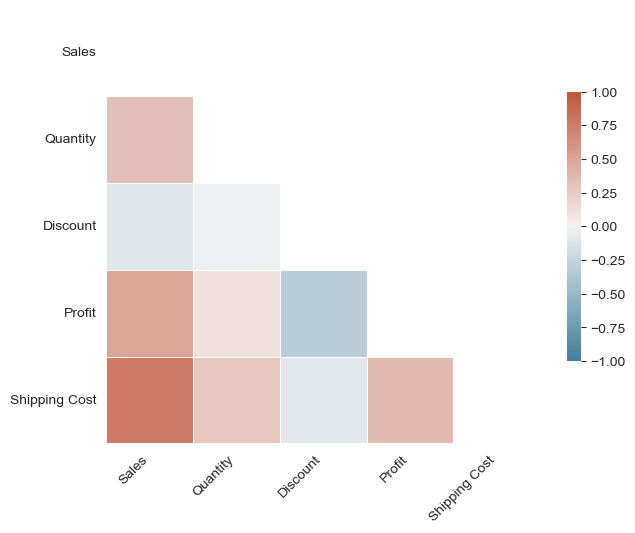

In [39]:
# Correlation Plot 
f, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(False)
plt.show()

## Distribution of the numerical variables

/Users/harry/anaconda3/envs/EDA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/harry/anaconda3/envs/EDA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/harry/anaconda3/envs/EDA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/harry/anaconda3/envs/EDA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

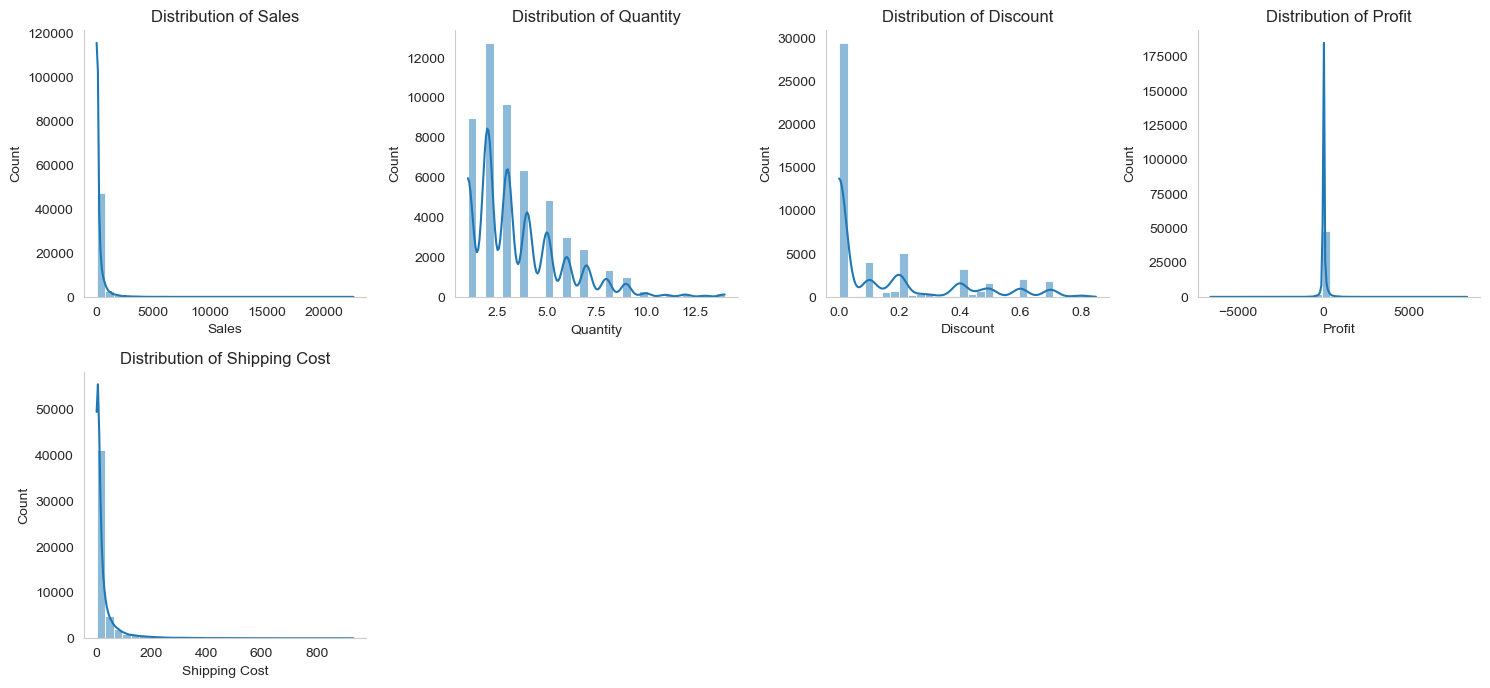

In [40]:
## Histograms of numeric variables
# Visualize the distribution of the data for each feature
plt.figure(figsize=(15, 10))

# Plotting the distribution of each column
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_numeric[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.grid(False)
    sns.despine() 

plt.show()